# Michaelis Menten Equation
## Original Version
$$
E + S \xrightleftharpoons[k_-]{k_+}  ES \xrightarrow{k_{cat}} E+P
$$

**Key assumption**: $c(ES)$ is in pseudo steady state.
According to the assumption, the production compensates for the consumption.
$$
k_+(S)(E)=k_-(ES)+k_{cat}(ES)=(k_-+k_{cat})(ES)\\
K_m \overset{def}{=} \frac{k_{cat}+k_-}{k_+}=\frac{(S)(E)}{(SE)}
$$
The constant $K_m$, irrelevant to concentration and determined by $k_i$ only, can be understood as consuming rate over producing rate.
**The target is to get the expression of reaction rate $v$ as a function of $(S)$ and $(E_0)$** (The initial concentration of enzyme)
$$
v=v((S),(E_0))
$$



We can start by 
$$
v=k_{cat}(SE)
$$
However $(SE)$ is unknown at present. Therefore we should solve it out. Here is the two additional conditions:
$$
E_0 = (E)+(SE)\\
(S)(E)=K_m(SE)
$$
That is a linear system of equations with respect to ($(E)$ and $(SE)$) which can be solved easily.
$$
(SE)=\frac{E_0(S)}{K_m+(S)}\\
(E)=\frac{E_0K_m}{K_m+(S)}
$$
Thus, we have
$$
v = v((S),(E_0))=k_{cat}(SE)=\frac{k_{cat}E_0(S)}{K_m+(S)}
$$

Here we can create two dimensionless variables
$$
y = \frac{v}{k_{cat}E_0}\\
x = \frac{(S)}{K_m}
$$
Substituting them into the original expression we can get
$$
y=\frac{x}{1+x}=1-\frac{1}{1+x}
$$
The visualization is shown bellow.


Here we can create two dimensionless variables
$$
y = \frac{v}{k_{cat}E_0}\\
x = \frac{(S)}{K_m}
$$
Substituting them into the original expression we can get
$$
y=\frac{x}{1+x}=1-\frac{1}{1+x}
$$
The visualization is shown bellow.

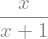

In [16]:
from sympy import *
init_printing()
x, y = symbols('x,y')
y = x/(1+x)
y

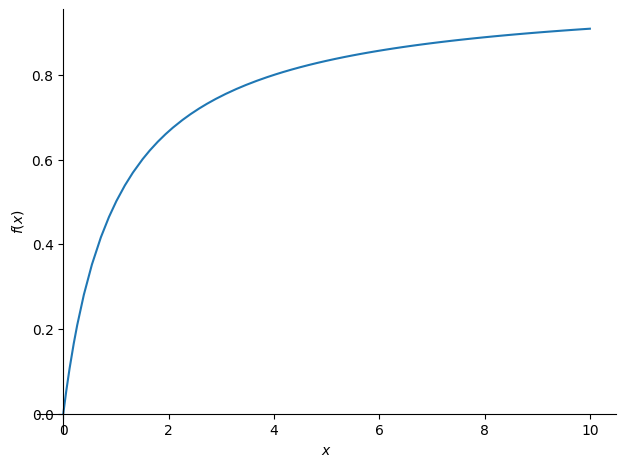

In [17]:
plot(y,(x,0,10))

To analyze analytically, we can differentiate $y(x)$
$$
y'(x)=\frac{1}{(1+x)^2}
$$
Here we can analyze its behavior at two limits.
$$
\lim_{x \to +\infty} y(x)=1\\
\lim_{x \to  0} y'(x)=1\\
\lim_{x \to  +\infty} y'(x)=0\\
$$
The consequence indicates that the reaction approximates the first order reaction at starting point while approaching the zeroth order reaction in long term. Besides there exists a maximum rate $v_0$ can be defined as following.
$$
v_{max} \overset{def}{=}k_{cat}E_0
$$
Substituting the maximum rate back into the Michaelis Menton equation we get the varied form.
$$
v = \frac{v_{max}(S)}{K_{m}+(S)}
$$

$$
y=\frac{x}{1+x}=\frac{1}{1+\frac{1}{x}}\\
y^{-1}=1+x^{-1}
$$
We can manipulate the above equation again to get a linear form corresponding to the following expression.
$$
\left(\frac{v}{v_{max}}\right)^{-1}=1+\left(\frac{(S)}{K_m}\right)^{-1}
$$
or 
$$
 \tilde{y}=\tilde{x}+1
$$


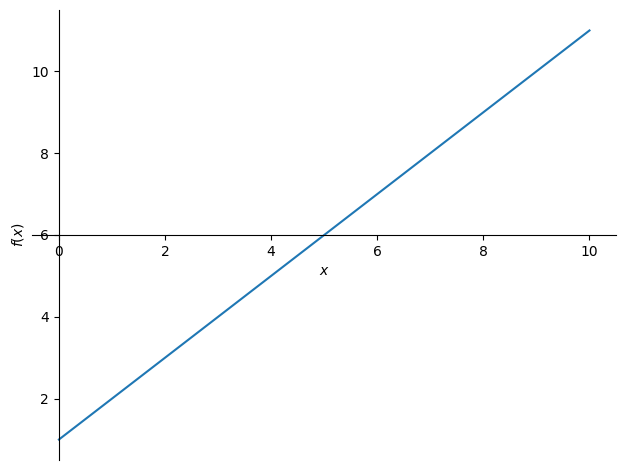

In [18]:
y=x+1
plot(y,(x,0,10))

## Meticulous Analysis of the Presumptions
$$
E + S \xrightleftharpoons[k_-]{k_+}  ES \xrightleftharpoons[k_{rev}]{k_{cat}} E+P
$$
* The rate $V_0$ under consideration is in initial period.
  * the concentration of product $[P]$ is negligible relatively, thus the reverse reaction $k_{rev}$ can be ignored.
  * in contrast to the equilibrium where the concentration of the product $[P]$ does not change anymore.
* The substrate concentration $[S]$ is ordinarily far greater than the enzyme concentration $[E]$.
  * the amount of bounded substrate $[ES]$ can be ignored compared with total substrate $[S]$.
  * $S_0\approx[S]$, the initial concentration $S_0$ approximates to equilibrial concentration $[S]$.
  * if $[S]$ is not sufficient, the Michaelis Menton equation holds while the above approximation breaks down.
  * so, Michaelis Menton equation is meaningful in experiment only when $[S]$ is large enough so that we can get to know $[S]$ easily.
* The first step is a relatively fast reversible step while the second step limits the overall rate.
  * the reaction quickly achieves at a steady state (first step rather than second step) where concentration of substrate bounded by enzyme $[ES]$ is steady.
    * $\frac{d}{dt}[ES]=0$
    * Since $S_0=[S]+[ES]$, $\frac{d}{dt}[S]+\frac{d}{dt}[ES]=0$, which means $[S]$ is also a constant in this model.
    * The constant $[S]$ seems to be absurd, however, given that the rate of step one is much more rapid than step two, it is acceptable at instant. Further more, large $[S]$ also supports the hypothesis.
  * this corresponds to the linear part of $[P]-t$ gram at initial period.
* The earliest period (pre-steady state) where $[ES]$ builds up is extremely short.
  * this presumption avoids the contradiction that may be caused by considering initial rate $V_0$ only while neglecting the earliest pre-steady state of the first step.
  * the initial step of overall reaction and step two is the steady state (equilibrium state) of step one.
  * the accurate earliest pre-steady state of step one is ignored actually.

## Uncompetitive Inhibitor
$$
E + S \xrightleftharpoons[k_-]{k_+}  ES \xrightarrow{k_{cat}} E+P\\
ES + I \xrightleftharpoons[k_{-1}]{k_{1}} ESI
$$

In [19]:
x, y, z, w,s,e,i,k0,k_0,k1,k_1,kc= symbols('(E),(I),(ES),(ESI),(S),E_0,I_0,k_+,k_-,k_1,k_{-1},k_{cat}')
x,y,z,w,s,e,i,k0,k_0,k1,k_1,kc

In [20]:
eq1 = Eq(k0*x*s+k_1*w,k_0*z+kc*z+k1*z*y)
eq1

In [21]:
eq2 = Eq(k1*z*y,k_1*w)
eq2

In [22]:
eq3 = Eq(e,x+z+w)
eq3

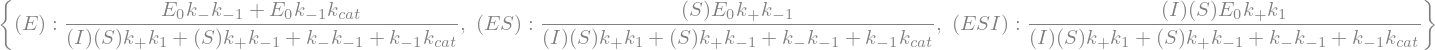

In [23]:
solution = solve((eq1,eq2,eq3),(x,z,w))
solution

After rearrangement we can get:
$$
v = \frac{k_{cat}(S)E_0}{(S)(1+(I)\frac{k_{1}}{k_{-1}})+K_m}=\frac{v_{max}(S)}{(S)(1+(I)\frac{k_{1}}{k_{-1}})+K_m}=\frac{v_{max}(S)}{\alpha '(S)+K_m}
$$

## Competitive Inhibitor
$$
E + S \xrightleftharpoons[k_-]{k_+}  ES \xrightarrow{k_{cat}} E+P\\
E + I \xrightleftharpoons[k_{-1}]{k_{1}} EI
$$

In [24]:
x, y, z, w,s,e,i,k0,k_0,k1,k_1,kc= symbols('(E),(I),(ES),(EI),(S),E_0,I_0,k_+,k_-,k_1,k_{-1},k_{cat}')
x,y,z,w,s,e,i,k0,k_0,k1,k_1,kc

In [25]:
eq1=Eq(e,x+z+w)
eq1

In [26]:
eq2=Eq(k0*x*s,k_0*z+kc*z)
eq2

In [27]:
eq3=Eq(k_1*w,k1*x*y)
eq3

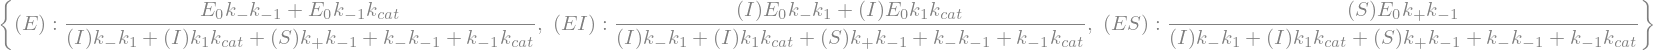

In [28]:
solution=solve((eq1,eq2,eq3),(x,z,w))
solution

After rearrangement we can get:
$$
v = \frac{k_{cat}(S)E_0}{(S)+K_m(1+(I)\frac{k_1}{k_{-1}})}=\frac{v_{max}(S)}{(S)+K_m(1+(I)\frac{k_1}{k_{-1}})}=\frac{v_{max}(S)}{\alpha 'K_m+(S)}
$$

To be noted that, the approximation of inhibitor concentration $I_0\approx[I]$ is not arbitrary.
$$
E + I \xrightleftharpoons[k_{-1}]{k_{1}} EI\\
k_1[E][I]=k_{-1}[EI] \Leftrightarrow [EI]=\frac{k_1[E][I]}{k_{-1}}
$$
$$
I_0\approx[I] \Leftrightarrow [I]>>[EI]=\frac{k_1[E][I]}{k_{-1}}
$$
which means
$$
\frac{k_{-1}}{k_1}>>[E]
$$
as long as $[E]$ is sufficiently fewer than a constant while it is irrelevant to the concentration of inhibitor itself !!!